<a href="https://colab.research.google.com/github/cool60334/Team_Project_Model/blob/main/Model_1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

台北市房屋交易_1110_2.csv 在github


In [ ]:
# 讀取csv檔案
f = pd.read_csv("台北市房屋交易_1110_2.csv", encoding = "utf-8")
pd.set_option('display.max_columns', 200)  # 增加顯示的列數

In [ ]:
# 去除非數值欄位(鄉鎮市區、地址、交易年月日、建築完成年月、交易年分、建築年分、緯度、經度)
# 去除已轉換成one-hot欄位(交易標的、土地使用分區、建築型態、主要用途、主要建材、車位類別)

f = f.drop(["dis", "sign", "add", "zone", "tradeymd", "state", "mainuse", "mater", "comy", "parkcat", "tradeyr", "buildyr", "lat", "lng"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
import numpy as np

In [ ]:
# 將土地移轉總面積平方公尺 標準化
f["totalm2"] = (f["totalm2"] - f["totalm2"].mean())/\
            (f["totalm2"].std())

In [ ]:
# 將建物移轉總面積平方公尺 標準化
f["totalbm2"] = (f["totalbm2"] - f["totalbm2"].mean())/\
            (f["totalbm2"].std()) 

In [ ]:
# 總價 標準化
f["tp"] = (f["tp"] - f["tp"].mean())/\
            (f["tp"].std())

In [ ]:
# 將車位移轉總面積(平方公尺) 標準化
f["parkm2"] = (f["parkm2"] - f["parkm2"].mean())/\
            (f["parkm2"].std())

In [ ]:
# 將車位總價元 標準化
f["parkp"] = (f["parkp"] - f["parkp"].mean())/\
            (f["parkp"].std())

In [ ]:
# 將主建物面積 標準化
f["mainbm2"] = (f["mainbm2"] - f["mainbm2"].mean())/\
            (f["mainbm2"].std())

In [ ]:
# 將附屬建物面積 標準化
f["auxbm2"] = (f["auxbm2"] - f["auxbm2"].mean())/\
            (f["auxbm2"].std())

In [ ]:
# 將陽台面積 標準化
f["balm2"] = (f["balm2"] - f["balm2"].mean())/\
            (f["balm2"].std())

In [ ]:
# 將所得中位數 標準化
f["med"] = (f["med"] - f["med"].mean())/\
            (f["med"].std())

In [ ]:
f.head()
f = f.drop(["year_average_cpi", "year_increase_cpi", "med", "park_d", "park_q", "mu_d", "mu_q", "lib_d", "lib_q", "mrt_d", "mrt_q", 
        "edu_d", "edu_q", "fire_d", "fire_q", "dead_d", "dead_q", "pol_d", "pol_q", "post_d", "post_q", "hosp_d", "hosp_q",
            "fin_d", "fin_q"], axis=1)

In [ ]:
f.head()

,totalm2,tradef,totalf,totalbm2,room,hall,health,sep,org,tp,unitp,parkm2,parkp,mainbm2,auxbm2,balm2,ele,建物,房地(土地+建物),房地(土地+建物)+車位,住,其他都市土地使用分區,商,住商用,住家用,其他主要用途,商業用,工業用,辦公用,磚造,鋼筋混凝土造,鋼骨造,其他車位類別,坡道平面,機械車位,無車位,age,住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝
0,0.689639,6,11,2.196536,0,0,0,0,1,2.414124,178307,2.983514,3.149126,0.984512,0.662454,-1.069258,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,15,1,0,0,0
1,0.078852,2,5,-0.127611,3,2,2,1,0,-0.637805,102820,-0.398459,-0.334222,0.054407,-0.300273,0.935205,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,45,0,1,0,0
2,0.057990,3,4,-0.306758,2,1,1,1,0,-0.167940,291409,-0.398459,-0.334222,-0.072108,-0.300273,-1.069258,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,53,0,1,0,0
3,0.095078,3,4,-0.293217,3,1,2,1,0,-0.769543,100040,-0.398459,-0.334222,-0.125819,-0.300273,0.465764,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,41,0,1,0,0
4,-0.491370,100,3,-0.676030,3,3,3,1,0,-0.923237,327600,-0.398459,-0.334222,-0.521931,-0.300273,-1.069258,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,28,0,0,0,1


In [ ]:
# 特徵(去除總價元、單價元平方公尺、車位總價元)

x = np.array(f.drop(["tp","unitp","parkp"], axis = 1))

In [ ]:
# 目標(取得總價元)

y = np.array(f["tp"])

In [ ]:
# 切分資料(特徵90%，特徵10%，目標90%，目標10%)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

#### 以迴圈跑5~12層決策樹各30次

In [ ]:
df = pd.DataFrame(columns =["d5", "d6", "d7", "d8", "d9", "d10", "d11"])

In [ ]:


from sklearn.tree import DecisionTreeRegressor

for d in range(5,12):
  
  s_list=[]
  i = 0
  for i in range(0, 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    
    # 建立迴歸決策樹
    reg = DecisionTreeRegressor(max_depth=d)

    # 訓練迴歸決策樹
    reg.fit(x_train, y_train)

    from sklearn.metrics import r2_score

    # 將測試用特徵帶入模型做預測
    pre = reg.predict(x_test)

    # 預測準確度
    s = r2_score(y_test, pre)
    i = i + 1
    s_list.append(s)

  df["d" + str(d)] = s_list


In [ ]:
df

,d5,d6,d7,d8,d9,d10,d11
0,0.379887,0.574197,0.211686,0.248843,-0.917457,0.241995,0.571578
1,0.344623,0.071804,0.353098,0.709961,0.706850,0.696455,0.553651
2,0.641789,0.586331,0.786645,0.470591,-3.245045,0.447419,-1.134295
3,-0.233161,0.605976,0.512770,-2.013456,0.660608,0.307132,0.395593
4,-0.821348,-0.455261,0.498021,0.537552,0.723912,0.441527,-1.280413
5,0.565897,0.492639,-0.950383,0.121802,-0.053212,0.535021,-1.487107
6,0.189031,-2.241350,-0.041569,-3.299938,0.465898,0.411175,0.456302
7,-0.497752,0.552091,0.319417,0.422273,0.364032,0.473796,0.512750
8,0.307658,0.551492,0.584359,-0.991341,0.210263,-0.550226,0.364825
9,0.643315,0.289862,0.576849,0.156099,0.501881,0.637391,0.560788


In [ ]:
import statistics

In [ ]:
mean_list = []
for i in range(5, 12):

  d_list = df["d" + str(i)].values.tolist()
  mean = statistics.mean(d_list)
  mean_list.append(mean)

In [ ]:
# 訓練30次後，每層決策樹的平均r2_score

mean_list

[0.18384732084964656,
 0.19024254560657575,
 0.37915179284546713,
 0.018293982714033076,
 0.2767696460139677,
 0.19744730276079095,
 -0.19950267870579147]

In [ ]:
# df.loc[5] = mean_list # 新增橫列

#### 跑單次決策樹

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 建立迴歸決策樹
reg = DecisionTreeRegressor(max_depth=8)

# 訓練迴歸決策樹
reg.fit(x_train, y_train)

from sklearn.metrics import r2_score

# 將測試用特徵帶入模型做預測
pre = reg.predict(x_test)

# 預測準確度
r2_score(y_test, pre)

0.3591789971967966

In [ ]:
# from sklearn import feature_importances
reg.feature_importances_

array([1.10110251e-01, 7.05810607e-03, 1.24701397e-02, 7.30190349e-01,
       6.53613889e-04, 5.50277564e-03, 0.00000000e+00, 0.00000000e+00,
       2.84411330e-05, 0.00000000e+00, 1.50027301e-02, 4.50131295e-04,
       1.42645746e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.64544498e-04, 6.59176056e-04, 0.00000000e+00,
       0.00000000e+00, 1.02688605e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.09312803e-05, 0.00000000e+00, 0.00000000e+00,
       1.14656971e-03, 8.09507742e-03, 8.88207748e-05, 3.23507389e-03,
       0.00000000e+00, 8.13131966e-02, 1.57811372e-03, 6.04978804e-03,
       1.70490700e-03, 0.00000000e+00])

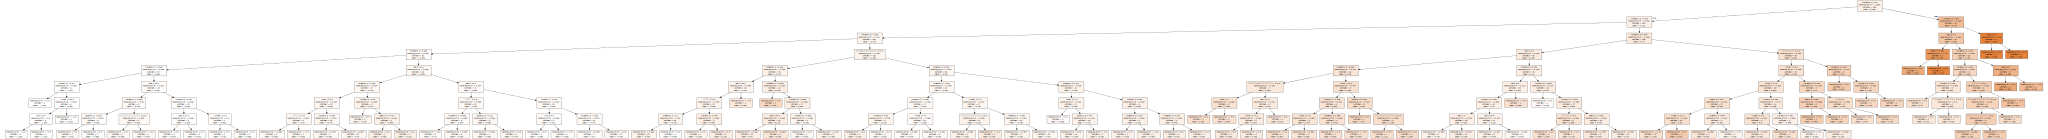

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg, out_file=None, 
            feature_names=f.drop(["tp","unitp","parkp"], axis = 1).columns,     
            filled=True, special_characters=True)

graph = graphviz.Source(g)
graph

In [ ]:
f.to_csv("台北市房屋交易_1110_2_正規化.csv", encoding = "utf-8", index=False)